In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column

from astropy.io import ascii
import glob, re

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=18               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


## This notebook reads in Keith's abundances and Guy's asteroseismology to produce the tables for the paper.

In [81]:
fname_diff = "../data/abundances/Pope_abundances_diff_arcturus.fits"
fname_nodiff = "../data/abundances/Pope_abundances_nodiff.fits"

In [82]:
diff = Table.read(fname_diff)
diff.sort('Object')
nodiff = Table.read(fname_nodiff)
nodiff.sort('Object')

How do abundances compare between the differential and non-differential methods? Not too badly. Many more elements lack differential abundances than absolute abundances so it looks like in the paper we shouldn't use the differential. Good to include in online data though.

In [83]:
# for j, key in enumerate(diff.keys()[1:]):
#     if key[0]=='e':
#         continue
#     plt.figure(j)
#     plt.plot(diff[key],nodiff[key],'.')
#     plt.title(key)

In [84]:
nodiff

Object,Ca_Fe,eCa_Fe,Mg_Fe,eMg_Fe,Si_Fe,eSi_Fe,Ti_Fe,eTi_Fe,O_Fe,eO_Fe,Al_Fe,eAl_Fe,Ba_Fe,eBa_Fe,Na_Fe,eNa_Fe,Ni_Fe,eNi_Fe,Mn_Fe,eMn_Fe,Co_Fe,eCo_Fe,Eu_Fe,eEu_Fe,La_Fe,eLa_Fe,Zr_Fe,eZr_Fe,Sr_Fe,eSr_Fe,Zn_Fe,eZn_Fe,Y_Fe,eY_Fe,Cr_Fe,eCr_Fe,V_Fe,eV_Fe,Cu_Fe,eCu_Fe,Sc_Fe,eSc_Fe
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BD+36_3564,0.20550000000000068,0.021811959427664313,0.32699999999999996,0.029981933288751386,0.1030000000000002,0.03033791174238739,0.3414999999999999,0.039563195412588896,nan,nan,0.39749999999999996,0.008838834764831969,nan,nan,0.2600000000000007,0.07726769244837267,0.006000000000000227,0.04284999081677555,0.07750000000000057,0.0045961940777125235,0.1299999999999999,0.023192941522005114,0.24799999999999933,0.02768573639981425,-0.016499999999999737,0.0659359300760974,0.10200000000000031,0.021922773547158676,0.3440000000000003,0.11825713509129157,-0.28699999999999903,0.19772933239377738,-0.2739999999999996,0.015773296262988193,0.23000000000000043,0.003797614382740828,0.1535000000000002,0.03049898435435564,-0.04499999999999971,0.06190150947270998,0.17300000000000093,0.017790381816734174
BD+39_3577,0.1330000000000009,0.024249415323230328,0.2150000000000003,0.03658925303282372,-0.10549999999999926,0.02174089847882709,0.08499999999999996,0.03879026485998592,nan,nan,0.20550000000000024,0.00954594154601844,0.3520000000000003,0.1010273157048059,0.41600000000000037,0.0,-0.051000000000000156,0.03328029088036782,-0.028999999999999027,0.05782989102787844,-0.015999999999999126,0.02072659732649556,-0.22100000000000009,0.04160228359116841,-0.254999999999999,0.015035759843588615,0.128000000000001,0.08221016968721083,nan,nan,-0.24099999999999877,0.7076482176901175,-0.4039999999999999,0.037289656991162025,0.1640000000000006,0.0952853444922145,0.010500000000000398,0.020276010901452025,-0.20599999999999952,0.012727922061357708,-0.12499999999999956,0.053405093390050375
BD+43_3064,0.18600000000000083,0.042992624259758146,0.2110000000000003,0.03401960219246152,-0.013999999999999346,0.030231207814540438,0.28249999999999975,0.044954827587674044,nan,nan,0.3550000000000004,0.010606601717797986,nan,nan,0.4790000000000001,0.06424951361683594,0.052999999999999936,0.044591812612475384,0.21400000000000086,0.024748737341528947,0.1330000000000009,0.02184520148655853,0.28000000000000025,0.05847007781763251,0.14950000000000063,0.017140503930748237,0.3230000000000004,0.03883977342879325,0.24800000000000022,0.12460813576970005,nan,nan,-0.13999999999999968,0.051714601419715026,0.32200000000000095,0.013075280607427315,0.24100000000000055,0.034289644203321076,-0.15899999999999936,0.09666551723454563,0.13700000000000045,0.024837935349126893
BD+43_3171,0.28550000000000075,0.027774123216385355,0.2570000000000001,0.06383866383313486,-0.0004999999999997229,0.06954906181969671,0.20650000000000013,0.05828622108614094,nan,nan,0.4225000000000003,0.012968712349342808,0.32650000000000023,0.17867480936046912,0.18350000000000044,0.24711535767734086,0.04100000000000037,0.05452977168483287,0.1095000000000006,0.0947523086789976,0.1385000000000005,0.05128187695268264,0.2134999999999998,0.04800520805079382,-0.057999999999999385,0.11110636795431662,0.3585000000000007,0.06505382386916242,nan,nan,-0.40499999999999936,0.05055813485483807,-0.3059999999999996,0.030052038200428254,0.2940000000000005,0.03995153313703977,0.12350000000000039,0.056319659089877294,0.017000000000000348,0.10812319362652953,0.1435000000000004,0.032129667788764645
BD+43_3213,0.1880000000000006,0.02661522816679147,0.22599999999999998,0.07206097859790929,-0.1779999999999995,0.11026558846711877,0.2709999999999999,0.06893329102190833,nan,nan,0.37200000000000033,0.038890872965260226,nan,nan,0.6230000000000002,0.367428

In [85]:
elements = filter(lambda x: x[0]!='e', nodiff.keys()[1:])
print elements

['Ca_Fe', 'Mg_Fe', 'Si_Fe', 'Ti_Fe', 'O_Fe', 'Al_Fe', 'Ba_Fe', 'Na_Fe', 'Ni_Fe', 'Mn_Fe', 'Co_Fe', 'Eu_Fe', 'La_Fe', 'Zr_Fe', 'Sr_Fe', 'Zn_Fe', 'Y_Fe', 'Cr_Fe', 'V_Fe', 'Cu_Fe', 'Sc_Fe']


### Create a string-formatted table merging abundances with their uncertainties appropriately.

In [86]:
newtab = Table([Column([str(obj).replace('_',' ') for obj in nodiff['Object']],name='Object')])

for el in elements[:8]:
    if el == 'O_Fe':
        continue
    col = nodiff[el]
    ecol = nodiff['e%s' % el]
    test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name='[%s/Fe]' % el.replace('_Fe',''))
#     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

    newtab.add_column(test)
    
#     print el


newtab2 = Table([Column([str(obj).replace('_',' ') for obj in nodiff['Object']],name='Object')])

for el in elements[8:15]:
    col = nodiff[el]
    ecol = nodiff['e%s' % el]
    test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name='[%s/Fe]' % el.replace('_Fe',''))
#     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

    newtab2.add_column(test)
    
newtab3 = Table([Column([str(obj).replace('_',' ') for obj in nodiff['Object']],name='Object')])

for el in elements[15:]:
    col = nodiff[el]
    ecol = nodiff['e%s' % el]
    test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name='[%s/Fe]' % el.replace('_Fe',''))
#     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

    newtab3.add_column(test)

    
# newtab_diff = Table([diff['Object']])

# for el in elements:
#     col = diff[el]
#     ecol = diff['e%s' % el]
#     test = Column(['--' if 'nan' in str(col[j]) else '%.2f $\pm$ %.2f' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))
# #     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

#     newtab_diff.add_column(test)


In [87]:
def oxford_join(string_list):
    '''From https://stackoverflow.com/questions/19838976/grammatical-list-join-in-python'''
    if len(string_list) < 1:
        text = ''
    elif len(string_list) == 1:
        text = string_list[0]
    elif len(string_list) == 2:
        text = ' and '.join(string_list)
    else:
        text = ', '.join(string_list)
        text = '{parts[0]}, and {parts[2]}'.format(parts=text.rpartition(', '))  # oxford comma
    return text

## Now produce three LaTeX tables to go into the paper directory.

In [88]:
latexdict = ascii.latex.latexdicts['AA'].copy()
latexdict['tabletype']= 'table*'

caption1 = r'Chemical abundances relative to iron for stars in the red giant sample as determined by BACCHUS, without differential line-by-line comparison to Arcturus, as described in Section~\ref{spectroscopy}, for the elements %s. Dashes indicate elements for which abundances could not be reliably computed.' % oxford_join([el.replace('_Fe','') for el in filter(lambda x: x !='O_Fe',elements[0:8])])
caption2 = r'Chemical abundances relative to iron for stars in the red giant sample as determined by BACCHUS, without differential line-by-line comparison to Arcturus, as described in Section~\ref{spectroscopy}, for the elements %s. Dashes indicate elements for which abundances could not be reliably computed.' % oxford_join([el.replace('_Fe','') for el in elements[8:15]])
caption3 = r'Chemical abundances relative to iron for stars in the red giant sample as determined by BACCHUS, without differential line-by-line comparison to Arcturus, as described in Section~\ref{spectroscopy}, for the elements %s. Dashes indicate elements for which abundances could not be reliably computed.' % oxford_join([el.replace('_Fe','') for el in elements[15:]])

caption1 = caption1+r'The catalogue of abundances for more elements continues in Tables~\ref{elems2} and~\ref{elems3}.'
caption2 = caption2+r'The catalogue of abundances for more elements continues in Table~\ref{elems3}.'


newtab.write('../paper/abundances_1.tex',format='latex',latexdict=latexdict,caption=caption1+'\label{elems1}',overwrite=True)
newtab2.write('../paper/abundances_2.tex',format='latex',latexdict=latexdict,caption=caption2+'\label{elems2}',overwrite=True)
newtab3.write('../paper/abundances_3.tex',format='latex',latexdict=latexdict,caption=caption3+'\label{elems3}',overwrite=True)

### Now let's also do the stellar properties

In [89]:
fname_merged ="../data/abundances/final_pope_merged.fits"
merged = Table.read(fname_merged)
merged.rename_column('RVerr','RV_err')
merged.keys()
merged.sort('Object')

In [90]:
newtab = Table([Column([str(obj).replace('_',' ') for obj in merged['Object']],name='Object')])

newkeys = ['RV', 'Teff', 'logg', 'monh','vsini','SNRe']
names = [r'RV',r'\teff', r'\logg',r'[M/H]',r'$V\sin{i}$',r'SNR']
units = [r'(km/s)', r'(K)', '','','(km/s)','']

for k, key in enumerate(newkeys):
    col = merged[key]
    if key+'_err' in merged.keys():
        ecol = merged['%s_err' % key]
        if 'Teff' in key:
            test = Column(['--' if 'nan' in str(col[j]) else '$%.0f \pm %.0f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=names[k])
        else:
            test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=names[k])
    else:
        test = Column(['%.1f' % (col[j]) for j, x in enumerate(col)],name=names[k])
    
    newtab.add_column(test)


In [91]:
newtab

Object,RV,\teff,\logg,[M/H],$V\sin{i}$,SNR
str10,str17,str13,str15,str16,str16,str5
BD+36 3564,$-77.84 \pm 0.05$,$4301 \pm 50$,$2.06 \pm 0.10$,$-0.34 \pm 0.08$,$5.14 \pm 0.50$,71.8
BD+39 3577,$-14.81 \pm 0.07$,$5079 \pm 50$,$3.00 \pm 0.10$,$-0.11 \pm 0.08$,$3.98 \pm 0.50$,92.8
BD+43 3064,$-13.65 \pm 0.06$,$4266 \pm 50$,$2.03 \pm 0.10$,$-0.21 \pm 0.08$,$5.17 \pm 0.50$,69.2
BD+43 3171,$-16.32 \pm 0.11$,$4072 \pm 50$,$2.02 \pm 0.10$,$-0.17 \pm 0.08$,$5.68 \pm 0.50$,68.6
BD+43 3213,$-14.16 \pm 0.16$,$4131 \pm 50$,$2.07 \pm 0.10$,$0.07 \pm 0.08$,$6.24 \pm 0.50$,57.3
BD+48 2955,$1.66 \pm 0.04$,$4344 \pm 50$,$2.11 \pm 0.10$,$-0.32 \pm 0.08$,$4.78 \pm 0.50$,31.7
HD 174020,$-14.84 \pm 0.08$,$4162 \pm 50$,$1.97 \pm 0.10$,$-0.10 \pm 0.08$,$5.81 \pm 0.50$,120.1
HD 174829,$10.15 \pm 0.03$,$4482 \pm 50$,$2.06 \pm 0.10$,$-0.40 \pm 0.08$,$4.41 \pm 0.50$,112.2
HD 175740,$-8.82 \pm 0.05$,$4973 \pm 50$,$2.97 \pm 0.10$,$-0.05 \pm 0.08$,$3.66 \pm 0.50$,264.0


In [92]:
latexdict = ascii.latex.latexdicts['AA'].copy()
latexdict['tabletype']= 'table*'
latexdict['units'] = dict(zip(names,units))

caption = r'Fundamental stellar parameters for the red giant sample as determined jointly by asteroseismology (asteroseismic \logg; Section~\ref{asteroseismology}) and spectroscopy (%s; Section~\ref{spectroscopy}.)' % oxford_join(names)  
caption = caption+r'\label{stellar_props}'
newtab.write('../paper/stellar_props.tex',format='latex',latexdict=latexdict,caption=caption+'\label{stellar_props}',overwrite=True)


### Now let's look at the proper spectroscopy with Dnu measurements

In [93]:
fname_seismic = "../data/smear_Dnu.csv"
seismic = Table.read(fname_seismic)
seismic.sort('Star_ID')

In [94]:
seismic

Star_ID,Dnu,Dnu_err,Numax,Numax_err,eps,eps_err
str10,float64,float64,float64,float64,float64,float64
BD+36_3564,0.9490949804411055,0.030097283743239316,5.079062736733746,0.09882652247868091,0.8305746287171062,0.20003026391376488
BD+39_3577,1.6836250688792482,0.01363988821142889,13.266855807051439,0.31633186319569034,0.7409609522947077,0.06299253167276896
BD+42_3150,4.221788591943251,0.028504804862306103,38.315943379269186,0.9588694546996247,0.7013731801198373,0.07075600621249865
BD+43_3171,0.41728859981040545,0.05318387492844148,1.984298734336489,0.05145104900196677,0.8040170562496404,0.17159665699501567
BD+43_3213,0.48750734592283734,0.006958633078022336,2.5632797174106847,0.06325084146747773,1.0124195735754942,0.07326685394355063
BD+48_2904,2.8511597676805804,0.010318892608438912,23.13453453354469,0.7225398099392429,0.8563054208127122,0.08052669688943252
BD+48_2955,0.8953098233940573,0.0068208356847463585,5.440132725276065,0.08331498484403516,0.8105480979445374,0.052471147709803705
HD_174020,0.5639183284003043,0.01603666749035637,2.47548965209216,0.09744999575175439,0.8926590744791576,0.08467569516842773
HD_174829,1.2833572675283929,0.011357043983480081,7.9497984768617815,0.1571667547811646,0.7755393571480604,0.05755641850899791


In [95]:
newtab = Table([Column([str(obj).replace('_',' ') for obj in seismic['Star_ID']],name='Object')])

newkeys = ['Dnu', 'Numax', 'eps']
names = [r'\Dnu',r'\numax', r'$\epsilon$']
units = [r'(\muHz)', r'(\muHz)','']

for k, key in enumerate(newkeys):
    col = seismic[key]
    if key+'_err' in seismic.keys():
        ecol = seismic['%s_err' % key]
        if 'Teff' in key:
            test = Column(['--' if 'nan' in str(col[j]) else '$%.0f \pm %.0f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=names[k])
        else:
            test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=names[k])
    else:
        test = Column(['%.1f' % (col[j]) for j, x in enumerate(col)],name=names[k])
    
    newtab.add_column(test)

latexdict = ascii.latex.latexdicts['AA'].copy()
latexdict['tabletype']= 'table'
latexdict['units'] = dict(zip(names,units))

caption = r'Bulk asteroseismic parameters %s for the red giant sample as discussed in Section~\ref{asteroseismology}.' % oxford_join(names)  
caption = caption+r'\label{astero_table}'
newtab.write('../paper/astero_table.tex',format='latex',latexdict=latexdict,caption=caption+'\label{stellar_props}',overwrite=True)


### Notes on individual stars from Guy Davies

BD+39_388 - No secure detection.

BD+43_306 - Big peaks but not consistent enough with RG pattern.

HD_179959 - Pattern is too complicated - is this two stars??  Literature says no.

HD_185351 - Odd mode envelope - No explanation.

HD_187217 - No info on this star - maybe a double but very difficult to tell.

HD_188639 - Too difficult to get a robust Dnu.

HD_188875 -  Too difficult to get a robust Dnu.

HD_188629 - Too difficult to get a robust Dnu.



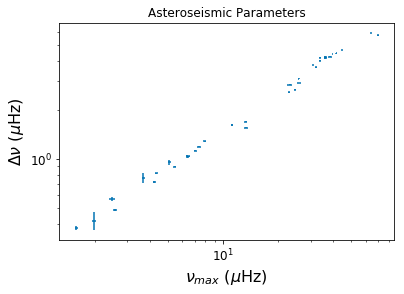

In [96]:
# the stars follow the expected numax-Dnu relation
plt.errorbar(seismic['Numax'],seismic['Dnu'],xerr=seismic['Numax_err'],yerr=seismic['Dnu_err'],linestyle='none')
plt.xlabel(r'$\nu_{max}$ ($\mu$Hz)')
plt.ylabel(r'$\Delta\nu$ ($\mu$Hz)')
plt.title('Asteroseismic Parameters')
plt.xscale('log')
plt.yscale('log')

### Which ones are missing?

In [97]:
badstars = ['BD+39_388','BD+43_306','HD_179959','HD_185351','HD_187217','HD_188639','HD_188875','HD_188629']
notes = ['No secure detection','Not consistent with RG pattern','Possible contamination',r'\citep{2017MNRAS.464.3713H}',
         'Possible contamination or binary',r'Too difficult to get a robust \Dnu',r'Too difficult to get a robust \Dnu',
         r'Too difficult to get a robust \Dnu']

notecol = [notes[j] if star in badstars else '' for j, star in enumerate(seismic['Star_ID'])]

In [98]:
np.sort(badstars)

array(['BD+39_388', 'BD+43_306', 'HD_179959', 'HD_185351', 'HD_187217',
       'HD_188629', 'HD_188639', 'HD_188875'], dtype='|S9')

In [99]:
for star in merged['Object']:
    if star[:9] not in seismic['Star_ID']:
        print star[:9]

BD+36_356
BD+39_357
BD+43_306
BD+43_317
BD+43_321
BD+48_295
HD_179959
HD_185351
HD_187217
HD_188629
HD_188875


In [100]:
for star in seismic['Star_ID']:
    if star not in merged['Object'].astype('S9'):
        print star

BD+36_3564
BD+39_3577
BD+42_3150
BD+43_3171
BD+43_3213
BD+48_2904
BD+48_2955
HD_176209
HD_182354
HD_189636
HD_189750


## Read the main catalogue

In [101]:
fname_cat = '../data/catalogue.csv'
cat = Table.read(fname_cat,format='ascii')
cat.sort('kepmag')

In [102]:
cat

Name,SpType,[Fe/H],theta,Observed,Seasons,Teff,Log_G,E(B-V),g,r,J,kepmag,Edge_Dist,Notes,Collaborators,Interferometry?,TRES?
str10,str15,float64,float64,str29,int64,int64,float64,float64,float64,float64,float64,float64,int64,str84,str16,str3,str3
HD_185351,G9IIIbCN,0.16,1.156,LC:Q1-3 SC:Q16 under,4,--,--,--,6.091,5.176,3.654,5.034,59,RG: Retired A star,Hjorringgaard,--,Yes
HD_186155,F5II-III,0.3,0.57,LC:Q1 under,4,--,--,--,5.44,5.065,4.419,5.055,66,three sharp peaks,--,--,--
HD_175740,G8III,-0.1,1.035,unobserved,4,--,--,--,6.486,5.462,4.08,5.212,0,RG: suppressed l=1,"Tim W, Guy, Cleo",Yes,Yes
HD_184875,A2V,--,0.349,unobserved,4,--,--,--,5.399,5.337,5.128,5.403,0,Classical Pulsator,--,--,--
14_Cyg,B9III,0.08,0.267,unobserved,4,--,--,--,5.334,5.394,5.365,5.49,0,"contact binary, interesting ramp at low freq",--,--,--
HD_189178,B5V,--,0.236,unobserved,4,--,--,--,5.356,5.448,5.595,5.552,0,Classical Pulsator,--,--,--
HD_187372,M1III,--,2.693,unobserved,4,--,--,--,7.805,6.141,2.979,5.672,110,RG: low freq,--,--,--
HD_182694,G7IIIa,-0.01,0.771,LC:Q2 under,4,--,--,--,6.76,5.86,4.437,5.722,137,RG,Tim W,Yes,--
V380_Cyg,B1.1III+B2.5/3V,1.25,0.226,LC:Q11 SC:Q7 9 10 12-17 under,4,--,--,--,5.615,5.675,5.712,5.771,122,Eclipsing_binary,--,--,--


In [103]:
print 'Clump Candidates:',oxford_join([name.replace('_',' ') for name in cat[np.array(['clump' in thing for thing in list(cat['Notes'].data.data[:])])]['Name']])

Clump Candidates: HD 181069, HD 182354, HD 183124, HD 182692, and HD 180658


### Now to get SIMBAD queries

In [104]:
from astroquery.simbad import Simbad
from astropy import coordinates as coord
from astropy import units as u


In [105]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('sptype')
sim = Simbad.query_objects(cat['Name'])
sim.write('smear_intermediate.csv',overwrite=True)
sim = Table.read('smear_intermediate.csv')
c = coord.SkyCoord(ra=sim['RA'], dec=sim['DEC'],unit=(u.hourangle, u.deg), frame='icrs')


In [106]:
new = Table([Column([cc.ra.deg for cc in c],name='RA',unit='deg',description='RA'),Column([cc.dec.deg for cc in c],name='Dec',unit='deg',description='Dec')],masked=False)
new.write('smear_simbad.csv')

We then use the gaia tap service at http://gaia.ari.uni-heidelberg.de/tap.html for crossmatch 
using the command

SELECT bj.source_id, sm.ra, sm.dec, sm.phot_g_mean_mag, bj.r_est, bj.r_lo, bj.r_hi
FROM gaiadr2_complements.geometric_distance as bj 
JOIN TAP_UPLOAD.smear AS sm ON sm.source_id = bj.source_id

In [107]:
dists = Table.read('../data/gaia_dists.csv')
# V2083_Cyg doesn't have a parallax
dists.insert_row(38,
                 vals={'source_id':2128480311802353536,'ra':292.818076238,'dec':47.481042633,
                       'phot_g_mean_mag':6.81,'r_est':np.nan,'r_lo':np.nan,'r_hi':np.nan})

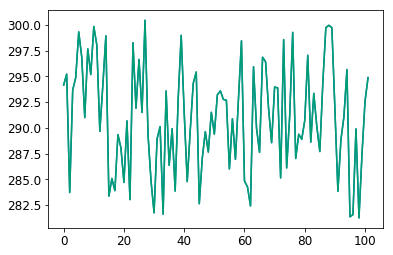

In [108]:
plt.plot(new['RA'])
plt.plot(dists['ra'])
# plt.xlim(35,45)

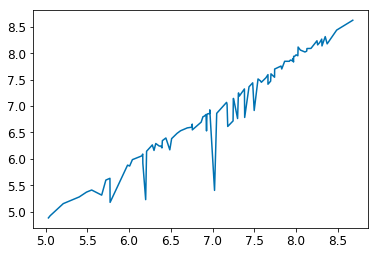

In [109]:
plt.plot(cat['kepmag'],dists['phot_g_mean_mag'])

In [110]:
cat[np.abs(dists['phot_g_mean_mag']-cat['kepmag'])>0.75]#.sort(np.abs(dists['phot_g_mean_mag']-cat['kepmag']))

Name,SpType,[Fe/H],theta,Observed,Seasons,Teff,Log_G,E(B-V),g,r,J,kepmag,Edge_Dist,Notes,Collaborators,Interferometry?,TRES?
str10,str15,float64,float64,str29,int64,int64,float64,float64,float64,float64,float64,float64,int64,str84,str16,str3,str3
V547_Lyr,M4IIIa,--,--,unobserved,4,--,--,--,8.109,6.611,2.258,6.199,48,RG: low freq,--,--,--
V398_Lyr,M3,--,--,unobserved,4,--,--,--,8.877,7.421,1.869,7.024,49,RG,--,--,--


In [111]:
dists[np.abs(dists['phot_g_mean_mag']-cat['kepmag'])>0.75]#.sort(np.abs(dists['phot_g_mean_mag']-cat['kepmag']))

source_id,ra,dec,phot_g_mean_mag,r_est,r_lo,r_hi
int64,float64,float64,float64,float64,float64,float64
2103815448491466496,285.0794350340927,40.683934166877044,5.227579,288.920092314708,276.921626546759,301.985143696241
2100382189073830528,287.05494859817054,39.154894446731085,5.4027195,494.665556977779,464.050015806101,529.522722362535


In [112]:
# sim

In [113]:
# newcat = cat.copy()
brightkep = Table.read('../data/Bright_Kep_new.csv')
newcat = join(cat,brightkep,keys='Name')
newcat['SpType']=sim['SP_TYPE']
for col in dists.columns:
    newcat.add_column(dists[col])

In [114]:
# for l, ccat in enumerate([cat[:52],cat[52:]]):

#     newtab = Table([Column([str(obj).replace('_',' ') for obj in ccat['Name']],name='Object')])

#     newkeys = ['SpType','kepmag', 'Observed', 'Seasons','TRES?']
#     names = [r'Spectral Type',r'$Kp$', r'Observed',r'Seasons','Spectroscopy']
#     units = [r'(SIMBAD)', r'(mag)','','','']

#     for k, key in enumerate(newkeys):
#         col = ccat[key]
#         if 'bs' in key:
#             test = Column([entry.replace('under','') if 'under' in entry else 'unobserved' for entry in col],name=names[k])
#         elif key != 'TRES?':
#             test = Column(col.data,name=names[k])
#         if key == 'TRES?':
#             test = Column(['TRES' if newtab['Object'][j].replace(' ','_') in merged['Object'] else '--' for j,entry in enumerate(col)], name=names[k])
#         newtab.add_column(test)
    
#     latexdict = ascii.latex.latexdicts['AA'].copy()
#     latexdict['tabletype']= 'table*'
#     latexdict['units'] = dict(zip(names,units))
#     if l == 0:
#         caption = r'The full set of underobserved and unobserved stars for which new light curves have been produced in this smear catalogue. Some objects, such as HD 185351, were observed in long cadence in some quarters and short cadence in others, and this is noted accordingly.' 
#         caption = caption+r'\label{all_stars}'
#         newtab.write('../paper/all_stars.tex',format='latex',latexdict=latexdict,caption=caption+'\label{all_stars}',overwrite=True)
#         print 'Written %s' % '../paper/all_stars.tex'
#     else:
#         latexdict['preamble'] = '\contcaption{The full set of underobserved and unobserved stars for which new light curves have been produced in this smear catalogue.  \label{all_stars_cont}}'
#         newtab.write('../paper/all_stars2.tex',format='latex',latexdict=latexdict,overwrite=True)
#         print 'Written %s' % '../paper/all_stars2.tex'


In [116]:
newcat.keys()

['Name',
 'SpType',
 '[Fe/H]',
 'theta',
 'Observed',
 'Seasons',
 'Teff',
 'Log_G',
 'E(B-V)',
 'g',
 'r',
 'J',
 'kepmag',
 'Edge_Dist',
 'Notes',
 'Collaborators',
 'Interferometry?',
 'TRES?',
 'Kepler_ID',
 'source_id',
 'ra',
 'dec',
 'phot_g_mean_mag',
 'r_est',
 'r_lo',
 'r_hi']

In [117]:
for l, ccat in enumerate([newcat[:52],newcat[52:]]):

    newtab = Table([Column([str(obj).replace('_',' ') for obj in ccat['Name']],name='Object')])

    newkeys = ['Kepler_ID','SpType','kepmag', 'phot_g_mean_mag','r_est','source_id','Observed', 'TRES?',]
    names = [r'KIC',r'Spectral Type',r'$Kp$',r'$G$',r'\gaia Distance',r'\gaia ID', r'Observed','Spectroscopy']
    units = ['',r'(SIMBAD)', r'(mag)','(mag)','(pc)','','','']

    for k, key in enumerate(newkeys):
        col = ccat[key]
        if 'bs' in key:
            test = Column([entry.replace('under','') if 'under' in entry else 'unobserved' for entry in col],name=names[k])
        elif 'ype' in key:
            test = Column(['--' if np.ma.is_masked(entry) else entry for entry in col],name=names[k])
        elif 'est' in key:
            upcol = ccat['r_hi']
            downcol = ccat['r_lo']
            test = Column(['--' if 'nan' in str(col[j]) else '$%.1f^{+%.1f}_{-%.1f}$' % (col[j],upcol[j]-col[j],col[j]-downcol[j]) for j, x in enumerate(col)],name=names[k])
        elif key != 'TRES?':
            test = Column(col.data,name=names[k])
        if key == 'TRES?':
            test = Column(['TRES' if newtab['Object'][j].replace(' ','_') in merged['Object'] else '--' for j,entry in enumerate(col)], name=names[k])
        newtab.add_column(test)
    
    latexdict = ascii.latex.latexdicts['AA'].copy()
    latexdict['tabletype']= 'table*'
    latexdict['units'] = dict(zip(names,units))
    if l == 0:
        caption = r'The full set of underobserved and unobserved stars for which new light curves have been produced in this smear catalogue. Calibrated \gaia distances are from \citep{gaiadists}. Some objects, such as HD~185351, were observed in long cadence in some quarters and short cadence in others, and this is noted accordingly. The eclipsing binary V2083~Cyg was detected by \gaia, but a parallax could not be obtained in DR2, possibly due to binary motion.' 
        caption = caption+r'\label{all_stars}'
        newtab.write('../paper/all_stars.tex',format='latex',latexdict=latexdict,caption=caption+'\label{all_stars}',overwrite=True)
        print 'Written %s' % '../paper/all_stars.tex'
    else:
        latexdict['preamble'] = '\contcaption{The full set of underobserved and unobserved stars for which new light curves have been produced in this smear catalogue. Calibrated \gaia distances are from \citep{gaiadists}. \label{all_stars_cont}}'
        newtab.write('../paper/all_stars2.tex',format='latex',latexdict=latexdict,overwrite=True)
        print 'Written %s' % '../paper/all_stars2.tex'
        

newtab = Table([Column([str(obj).replace('_',' ') for obj in newcat['Name']],name='Object')])

newkeys = ['SpType','kepmag', 'phot_g_mean_mag','r_est','source_id','Observed','TRES?',]
names = [r'Spectral Type',r'$Kp$',r'$G$',r'\gaia Distance',r'\gaia ID', r'Observed','Spectroscopy']
units = [r'(SIMBAD)', r'(mag)','(mag)','(pc)','','','']

for k, key in enumerate(newkeys):
    col = newcat[key]
    if 'bs' in key:
        test = Column([entry.replace('under','') if 'under' in entry else 'unobserved' for entry in col],name=names[k])
    elif 'ype' in key:
        test = Column(['--' if np.ma.is_masked(entry) else entry for entry in col],name=names[k])
    elif 'est' in key:
        upcol = newcat['r_hi']
        downcol = newcat['r_lo']
        test = Column(['--' if 'nan' in str(col[j]) else '$%.1f^{+%.1f}_{-%.1f}$' % (col[j],upcol[j]-col[j],col[j]-downcol[j]) for j, x in enumerate(col)],name=names[k])
    elif key != 'TRES?':
        test = Column(col.data,name=names[k])
    if key == 'TRES?':
        test = Column(['TRES' if newtab['Object'][j].replace(' ','_') in merged['Object'] else '--' for j,entry in enumerate(col)], name=names[k])
    newtab.add_column(test)

latexdict = ascii.latex.latexdicts['AA'].copy()
latexdict['tabletype']= 'table*'
latexdict['units'] = dict(zip(names,units))


Written ../paper/all_stars.tex
Written ../paper/all_stars2.tex


In [55]:
np.ma.is_masked(newcat['SpType'][62])

True

In [77]:
col = ccat['r_est']
upcol = ccat['r_hi']
downcol = ccat['r_lo']
test = Column(['--' if 'nan' in str(col[j]) else '$%.2f^{+%.2f}_{-%.2f}$' % (col[j],upcol[j]-col[j],col[j]-downcol[j]) for j, x in enumerate(col)])


In [78]:
test

$226.46^{+2.38}_{-2.33}$
$175.45^{+2.60}_{-2.52}$
$761.98^{+15.77}_{-15.15}$
$472.04^{+5.38}_{-5.26}$
$226.57^{+1.26}_{-1.25}$
$406.09^{+4.85}_{-4.74}$
$361.15^{+6.35}_{-6.14}$
$629.92^{+11.39}_{-11.00}$
$587.77^{+13.11}_{-12.56}$
...
$143.27^{+0.68}_{-0.68}$


In [79]:
newcat

Name,SpType,[Fe/H],theta,Observed,Seasons,Teff,Log_G,E(B-V),g,r,J,kepmag,Edge_Dist,Notes,Collaborators,Interferometry?,TRES?,source_id,ra,dec,phot_g_mean_mag,r_est,r_lo,r_hi
str10,str16,float64,float64,str29,int64,int64,float64,float64,float64,float64,float64,float64,int64,str84,str16,str3,str3,int64,float64,float64,float64,float64,float64,float64
HD_185351,G8.5IIIbFe-0.5,0.16,1.156,LC:Q1-3 SC:Q16 under,4,--,--,--,6.091,5.176,3.654,5.034,59,RG: Retired A star,Hjorringgaard,--,Yes,2078403295235690112,294.1576613499853,44.69448231480843,4.881522,41.2315213779136,41.0921558133897,41.3718185719601
HD_186155,F5II-III,0.3,0.57,LC:Q1 under,4,--,--,--,5.44,5.065,4.419,5.055,66,three sharp peaks,--,--,--,2079990268465009024,295.2096161867121,45.525456779018434,4.923168,50.6145097045851,50.1993792798511,51.0364389381494
HD_175740,G8III,-0.1,1.035,unobserved,4,--,--,--,6.486,5.462,4.08,5.212,0,RG: suppressed l=1,"Tim W, Guy, Cleo",Yes,Yes,2104485016711846656,283.71739473102826,41.602710757624294,5.152375,81.4820221791748,80.9011996865216,82.0710941761192
HD_184875,A2V,--,0.349,unobserved,4,--,--,--,5.399,5.337,5.128,5.403,0,Classical Pulsator,--,--,--,2077737571001053312,293.6719373022101,42.41237709026624,5.2788925,172.612235076612,169.44660100199,175.896210554269
14_Cyg,B9III,0.08,0.267,unobserved,4,--,--,--,5.334,5.394,5.365,5.49,0,"contact binary, interesting ramp at low freq",--,--,--,2077959092540451456,294.86048629287325,42.818403728771564,5.3699827,194.251074278231,187.684456735487,201.285145272043
HD_189178,B5V,--,0.236,unobserved,4,--,--,--,5.356,5.448,5.595,5.552,0,Classical Pulsator,--,--,--,2073537612700605696,299.3078202055931,40.36782658479405,5.41016,347.305675377642,335.171242466141,360.335028693868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BD+43_3064,K5,--,--,unobserved,3,--,--,--,10.18,8.692,6.205,8.284,0,RG,--,--,--,2117284053614333312,281.3657024307495,43.995236683395596,8.20331,641.029617229135,621.919910626924,661.328015894773
BD+43_3068,G0,--,--,unobserved,4,5506,4.394,0.011,8.754,8.254,7.181,8.308,0,not good,--,--,--,2117267079903573504,281.57417508745425,43.81556598527454,8.267944,53.7738365747513,53.6508736699958,53.8973543593231


## Now make an HR diagram

In [119]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

gaia = Table.read('SingleSource[FILE=smear_simbad.csv].vot',format='votable')
reload(sys)

In [120]:
bp, rp, gg = gaia['phot_bp_mean_mag'], gaia['phot_rp_mean_mag'], gaia['phot_g_mean_mag']
gaia['bp'], gaia['rp'],gaia['gg'] = bp, rp, gg

In [121]:
def abs_mag(app_mag,dist):
    return app_mag - 5.*(np.log10(dist) - 1.)

In [122]:
snrs = dists['r_est']/((dists['r_hi']-dists['r_lo'])/2.)
np.nanmedian(snrs)

71.39072222295582

In [123]:
abs_gg = abs_mag(gg,dists['r_est'])
gaia['abs_gg'] = abs_gg
abs_gg_hi = abs_mag(gg,dists['r_hi'])
abs_gg_lo = abs_mag(gg,dists['r_lo'])

In [124]:
errorbars = np.zeros((2,np.size(abs_gg)))
errorbars[0,:] = abs_gg_hi-abs_gg
errorbars[1,:] = abs_gg-abs_gg_lo

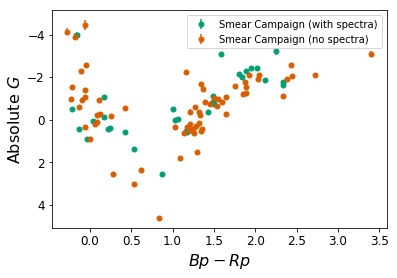

In [125]:
rc('text', usetex=False)
m = newtab['Spectroscopy']!='--'
plt.errorbar(bp[m]-rp[m],abs_gg[m],yerr=errorbars[:,m],fmt='.',color=colours[1],label=r'Smear Campaign (with spectra)',markersize=10)
plt.errorbar(bp[~m]-rp[~m],abs_gg[~m],yerr=errorbars[:,~m],fmt='.',color=colours[2],label=r'Smear Campaign (no spectra)',markersize=10)
plt.gca().invert_yaxis()
plt.xlabel(r'$Bp-Rp$')
plt.ylabel(r'Absolute $G$')
plt.legend()

Now we want to use Megan Bedell's Gaia-Kepler crossmatch to situate these in the broader colour-magnitude diagram

In [126]:
kep_data = Table.read('../data/kepler_dr2_4arcsec.fits', format='fits')


In [127]:
kep_data['abs_gmag'] = kep_data['phot_g_mean_mag'] - \
                            5.*(np.log10(kep_data['r_est']) - 1.)
kep_data['abs_gmag'].unit = u.mag

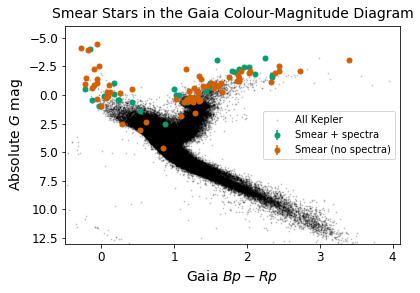

In [131]:
filter = (kep_data['phot_g_mean_mag'] <= 18.) & (kep_data['parallax'] > 0.1)
filter = (kep_data['phot_g_mean_mag'] <= 18.) & (kep_data['parallax_over_error'] > 25)

plt.scatter(kep_data['bp_rp'][filter], kep_data['abs_gmag'][filter], alpha=0.15, color='k', s=1,label='All Kepler')
m = newtab['Spectroscopy']!='--'
plt.errorbar(bp[m]-rp[m],abs_gg[m],yerr=errorbars[:,m],fmt='.',color=colours[1],label=r'Smear + spectra',markersize=10)
plt.errorbar(bp[~m]-rp[~m],abs_gg[~m],yerr=errorbars[:,~m],fmt='.',color=colours[2],label=r'Smear (no spectra)',markersize=10)

plt.xlabel('Gaia $Bp-Rp$', fontsize=14)
plt.ylabel(r'Absolute $G$ mag', fontsize=14)
plt.ylim([13,-6])
plt.xlim([-0.5,4.1])
plt.legend()
plt.title(r'Smear Stars in the Gaia Colour-Magnitude Diagram',y=1.01,fontsize=14)
# plt.axvline(0.95) # separate giants and dwarfs 
plt.savefig('../paper/gaia_kepler_hr.png',bbox_inches='tight')

In [142]:
sum(bp-rp>0.95)

64

## Now compare to Hypatia

In [124]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('ids')
sim = Simbad.query_objects(cat['Name'])
ids = sim['IDS']

In [80]:
import re
hips = []
for eyedee in ids:
    m = re.search('\|HIP  (.+?)\|',str(eyedee))
    if m:
        found = m.group(1)
    print found
    hips.append(found)

96459
96825
92831
96288
96693
98194
97372
95352
97634
96805
98383
97774
94890
96449
98058
92713
93309
92891
94799
94351
93177
95245
92599
97845
95673
97304
95534
98610
94781
93210
92156
94659
95056
92116
96252
93749
94977
92869
96011
98071
95524
93204
94923
96517
96887
92455
93989
94880
94192
95543
94814
94814
96256
95980
95943
93631
95314
93946
95989
97906
93222
93022
93022
97078
94998
94182
97366
97225
95653
94518
96390
96357
93327
97936
93665
95409
95409
93977
94808
94644
95254
95254
94536
96179
95064
94211
94211
94211
94211
94211
95666
92861
94619
94619
94619
94619
94619
94619
91994
91994
95907
96696


HD 185351|AG+44 1630|BD+44 3185|GC 27140|GCRV 12021|GEN# +1.00185351|GSC 03147-01921|HIC 96459|HIP 96459|HR 7468|IRAS 19350+4434|KIC 8566020|2MASS J19363801+4441418|PLX 4610|PLX 4610.00|PPM 58585|ROT 2826|1RXS J193637.6+444137|SAO 48649|SKY# 36595|SPOCS 3088|TD1 25124|TYC 3147-1921-1|UBV 16672|UBV M 23982|WEB 16922|Gaia DR2 2078403295235690112
HD 186155|AG+45 1570|BD+45 2949|CCDM J19409+4531A|CSI+45 2949 1|FK5 3575|GC 27249|GCRV 12073|GEN# +1.00186155|GSC 03556-03772|HIC 96825|HIP 96825|HR 7495|IDS 19378+4517 A|IRAS 19392+4524|2MASS J19405016+4531295|NSV 12300|PLX 4627|PLX 4627.00|PPM 58681|ROT 2834|SAO 48718|SKY# 36771|TD1 25272|TYC 3556-3772-1|UBV 16750|UBV M 24056|uvby98 100186155|WDS J19408+4532A|WEB 16993|Gaia DR2 2079990268465009024|Gaia DR1 2079990264172082304
HD 175740|ADS 11840 A|AG+41 1639|AKARI-IRC-V1 J1854521+413610|BD+41 3177|CCDM J18549+4136A|CSI+41 3177 1|GC 25972|GCRV 11379|GEN# +1.00175740|GSC 03127-02260|HIC 92831|HIP 92831|HR 7146|IDS 18517+4128 A|IRAS 18532+4132|IRC +40333|2MASS J18545217+4136098|PPM 57629|SAO 47909|SKY# 34837|TD1 23531|TYC 3127-2260-1|UBV M 23335|WDS J18549+4136A|WEB 16069|Gaia DR2 2104485016711846656
HD 184875|AG+42 1724|BD+42 3386|CEL 4789|GC 27070|GCRV 11989|GEN# +1.00184875|GSC 03143-02179|HIC 96288|HIP 96288|HR 7444|IRAS 19330+4218|2MASS J19344127+4224448|PLX 4597|PLX 4597.00|PPM 58526|ROT 2819|SAO 48601|SKY# 36507|TD1 25018|TYC 3143-2179-1|UBV 16624|uvby98 100184875|WEB 16880|Gaia DR2 2077737571001053312|Gaia DR1 2077737571001053312
* 14 Cyg|AG+42 1737|AKARI-IRC-V1 J1939264+424906|ALS 16589|BD+42 3413|CEL 4812|FK5 3572|GC 27213|GCRV 12052|GEN# +1.00185872|GSC 03143-02178|HD 185872|HIC 96693|HIP 96693|HR 7483|IRAS 19378+4242|2MASS J19392648+4249057|N30 4351|PLX 4622.1|PLX 4622.10|PPM 58649|Renson 51260|ROT 2831|SAO 48691|SKY# 36703|TD1 25222|TYC 3143-2178-1|UBV 16723|UBV M 24029|uvby98 100185872|WEB 16963|Gaia DR2 2077959092540451456|Gaia DR1 2077959088236964736
HD 189178|AG+40 1935|BD+39 3968|CCDM J19572+4022A|FK5 3593|GC 27649|GCRV 12312|GEN# +1.00189178|GSC 03141-03693|HGAM 813|HIC 98194|HIP 98194|HR 7628|IDS 19538+4006 A|2MASS J19571387+4022041|N30 4414|PPM 59089|Renson 52400|ROT 2890|SAO 49011|SBC9 1191|SKY# 37388|TD1 25781|TYC 3141-3693-1|UBV 17030|UBV M 24342|uvby98 100189178|WDS J19572+4022A|WEB 17314|Gaia DR2 2073537612700605696
HD 187372|AG+47 1472|BD+47 2916|DO 37751|GC 27407|GCRV 12165|GEN# +1.00187372|GSC 03561-02129|HIC 97372|HIP 97372|HR 7547|IRAS 19459+4746|IRC +50309|2MASS J19472682+4754273|NSV 24891|PPM 58843|RAFGL 2459|SAO 48842|SBC9 2955|SKY# 36993|TYC 3561-2129-1|UBV M 24185|WEB 17112|Gaia DR2 2086614688589352320
HD 182694|AG+43 1652|BD+43 3229|GC 26794|GCRV 11855|GEN# +1.00182694|GSC 03146-01835|HIC 95352|HIP 95352|HR 7382|IRAS 19223+4317|2MASS J19235651+4323175|PPM 58264|SAO 48401|SKY# 36083|TD1 24648|TYC 3146-1835-1|UBV M 23757|WEB 16666|Gaia DR2 2126062687590513408|Gaia DR1 2126062687590513408
V* V380 Cyg|AG+40 1912|ALS 10571|BD+40 3902|CEL 4859|FK5 3584|GC 27492|GCRV 12207|GEN# +1.00187879|GSC 03141-03692|HD 187879|HGAM 802|HIC 97634|HIP 97634|HR 7567|KIC 5385723|LS III +40 2|2MASS J19503733+4035591|MCW 763|N30 4391|PPM 58921|ROT 2860|SAO 48892|SBC7 769|SBC9 1180|SKY# 37121|TD1 25579|TYC 3141-3692-1|UBV M 24223|uvby98 100187879|WEB 17167|[B10] 5070|[GS83] 72|AAVSO 1947+40|Gaia DR2 2073743839843579776|Gaia DR1 2073743835537822336
...
BD+39 3882|AG+39 1990|CCDM J19426+4001B|GSC 03140-02922|IDS 19391+3948 B|2MASS J19423656+3959528|PPM 83402|SAO 68733|SKY# 36831|TYC 3140-2922-1|uvby98 003903882|Gaia DR2 2076372669064227200|Gaia DR1 2076372664758050176


In [92]:
hinkel = Table.read('../data/hypatia-03082018.csv')

In [93]:
in_hyp = []
for j, hip in enumerate(hips):
    if int(hip) in hinkel['f_hip']:
        print hip, sim['MAIN_ID'][j]
        in_hyp.append((hip,sim['MAIN_ID'][j]))

In [94]:
in_hyp

[('96459', 'HD 185351'), ('92831', 'HD 175740')]

In [95]:
sim

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,IDS
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,unicode13,unicode13,int16,int16,float32,float32,int16,unicode1,unicode1,object,object
HD 185351,19 36 37.9763,+44 41 41.760,14,14,0.068,0.079,90,A,O,2018yCat.1345....0G,HD 185351|AG+44 1630|BD+44 3185|GC 27140|GCRV 12021|GEN# +1.00185351|GSC 03147-01921|HIC 96459|HIP 96459|HR 7468|IRAS 19350+4434|KIC 8566020|2MASS J19363801+4441418|PLX 4610|PLX 4610.00|PPM 58585|ROT 2826|1RXS J193637.6+444137|SAO 48649|SKY# 36595|SPOCS 3088|TD1 25124|TYC 3147-1921-1|UBV 16672|UBV M 23982|WEB 16922|Gaia DR2 2078403295235690112
HD 186155,19 40 50.1834,+45 31 29.780,14,14,0.149,0.149,90,A,O,2018yCat.1345....0G,HD 186155|AG+45 1570|BD+45 2949|CCDM J19409+4531A|CSI+45 2949 1|FK5 3575|GC 27249|GCRV 12073|GEN# +1.00186155|GSC 03556-03772|HIC 96825|HIP 96825|HR 7495|IDS 19378+4517 A|IRAS 19392+4524|2MASS J19405016+4531295|NSV 12300|PLX 4627|PLX 4627.00|PPM 58681|ROT 2834|SAO 48718|SKY# 36771|TD1 25272|TYC 3556-3772-1|UBV 16750|UBV M 24056|uvby98 100186155|WDS J19408+4532A|WEB 16993|Gaia DR2 2079990268465009024|Gaia DR1 2079990264172082304
HD 175740,18 54 52.1775,+41 36 09.793,14,14,0.075,0.082,90,A,O,2018yCat.1345....0G,HD 175740|ADS 11840 A|AG+41 1639|AKARI-IRC-V1 J1854521+413610|BD+41 3177|CCDM J18549+4136A|CSI+41 3177 1|GC 25972|GCRV 11379|GEN# +1.00175740|GSC 03127-02260|HIC 92831|HIP 92831|HR 7146|IDS 18517+4128 A|IRAS 18532+4132|IRC +40333|2MASS J18545217+4136098|PPM 57629|SAO 47909|SKY# 34837|TD1 23531|TYC 3127-2260-1|UBV M 23335|WDS J18549+4136A|WEB 16069|Gaia DR2 2104485016711846656
HD 184875,19 34 41.2618,+42 24 45.039,14,14,0.088,0.102,90,A,O,2018yCat.1345....0G,HD 184875|AG+42 1724|BD+42 3386|CEL 4789|GC 27070|GCRV 11989|GEN# +1.00184875|GSC 03143-02179|HIC 96288|HIP 96288|HR 7444|IRAS 19330+4218|2MASS J19344127+4224448|PLX 4597|PLX 4597.00|PPM 58526|ROT 2819|SAO 48601|SKY# 36507|TD1 25018|TYC 3143-2179-1|UBV 16624|uvby98 100184875|WEB 16880|Gaia DR2 2077737571001053312|Gaia DR1 2077737571001053312
* 14 Cyg,19 39 26.4883,+42 49 05.781,14,14,0.157,0.163,90,A,O,2018yCat.1345....0G,* 14 Cyg|AG+42 1737|AKARI-IRC-V1 J1939264+424906|ALS 16589|BD+42 3413|CEL 4812|FK5 3572|GC 27213|GCRV 12052|GEN# +1.00185872|GSC 03143-02178|HD 185872|HIC 96693|HIP 96693|HR 7483|IRAS 19378+4242|2MASS J19392648+4249057|N30 4351|PLX 4622.1|PLX 4622.10|PPM 58649|Renson 51260|ROT 2831|SAO 48691|SKY# 36703|TD1 25222|TYC 3143-2178-1|UBV 16723|UBV M 24029|uvby98 100185872|WEB 16963|Gaia DR2 2077959092540451456|Gaia DR1 2077959088236964736
HD 189178,19 57 13.8676,+40 22 04.171,14,14,0.079,0.112,90,A,O,2018yCat.1345....0G,HD 189178|AG+40 1935|BD+39 3968|CCDM J19572+4022A|FK5 3593|GC 27649|GCRV 12312|GEN# +1.00189178|GSC 03141-03693|HGAM 813|HIC 98194|HIP 98194|HR 7628|IDS 19538+4006 A|2MASS J19571387+4022041|N30 4414|PPM 59089|Renson 52400|ROT 2890|SAO 49011|SBC9 1191|SKY# 37388|TD1 25781|TYC 3141-3693-1|UBV 17030|UBV M 24342|uvby98 100189178|WDS J19572+4022A|WEB 17314|Gaia DR2 2073537612700605696
...,...,...,...,...,...,...,...,...,...,...,...
BD+43 3068,18 46 17.7487,+43 48 56.392,14,14,0.035,0.038,90,A,O,2018yCat.1345....0G,BD+43 3068|AG+43 1566|GSC 03130-02191|2MASS J18461773+4348564|PPM 57477|SAO 47785|TYC 3130-2191-1|Gaia DR2 2117267079903573504|Gaia DR1 2117267075604798080


In [96]:
# import altair as alt
import pandas as pd

In [97]:
pdg = gaia.to_pandas()
pdg.assign(bprp=pdg.bp - pdg.rp);
pdg.insert(len(pdg.columns), 'bprp', pd.Series(pdg.bp-pdg.rp, index=pdg.index))
pdg.insert(len(pdg.columns), 'name', pd.Series(sim['MAIN_ID'], index=pdg.index))
spec = ['TRES' if sp==1 else 'No  Spectra' for sp in newtab['Spectroscopy']!='--']
pdg.insert(len(pdg.columns), 'Spectroscopy', pd.Series(spec, index=pdg.index))
pdg.insert(len(pdg.columns), 'SpType', pd.Series(newcat['SpType'], index=pdg.index))

# pdkep = kep_data.to_pandas()

In [98]:
# # background = alt.Chart(pdkep).mark_point().encode(
# #     x='bp_rp',
# #     y='abs_gmag').properties(alpha=0.2)
# xrange = (-0.5,4.1)
# yrange = (13,-6)

# smear_chart = alt.Chart(pdg).mark_circle().encode(
#     alt.X('bprp',scale=alt.Scale(domain=xrange,clamp=True)),
#     alt.Y('abs_gg',scale=alt.Scale(domain=yrange,clamp=True)),
#     tooltip='name',
#     color='Spectroscopy',
#     size=alt.value(42)
# )


In [99]:
# smear_chart

In [100]:
# background = alt.Chart(pdkep).mark_rect().encode(
#     alt.X('bp_rp',scale=alt.Scale(domain=xrange,clamp=True),bins=alt.Bin(maxbins=50)),
#     alt.Y('abs_gmag',scale=alt.Scale(domain=yrange,clamp=True),bins=alt.Bin(maxbins=50))
# )


### The *Kepler* dataset is too big for Altair. But not for Bokeh - let's copy from at demo.ipynb from github.com/megbedell/gaia-kepler.fun

In [128]:
from bokeh.plotting import *
from bokeh.io import output_notebook
from bokeh.models import OpenURL, Circle, HoverTool, PanTool, BoxZoomTool, ResetTool, SaveTool, TapTool, WheelZoomTool
from bokeh.util.hex import hexbin
from bokeh.transform import linear_cmap, factor_cmap
from bokeh.palettes import Spectral6
reset_output()
output_file("cmd_smear.html")
# output_notebook()

In [127]:
filter1 = (kep_data['phot_g_mean_mag'] <= 18.) & (kep_data['parallax_over_error'] > 25)
filter2 = (kep_data['planet?'] == 'conf') & filter1

filter2 = filter1 

thin = 4

source = ColumnDataSource(
    data=dict(
        kepid=kep_data[filter2]['kepid'].data.data[::thin],
        kepmag=kep_data[filter2]['kepmag'].data.data[::thin],
        bp_rp=kep_data[filter2]['bp_rp'].data.data[::thin],
        abs_gmag=kep_data[filter2]['abs_gmag'].data.data[::thin],
        mass=kep_data[filter2]['mass'].data.data[::thin],
        radius=kep_data[filter2]['radius'].data.data[::thin]
        )
    )

source_smear = ColumnDataSource(
    data=dict(
        name=pdg.name.values,
        abs_gmag=pdg.abs_gg.values,
        bp_rp=pdg.bprp.values,
        spec=pdg.Spectroscopy.values,
        sptype=pdg.SpType.values
        )
    )


In [129]:
%%time
xrange = (-0.5,4.1)
yrange = (13,-6)

fig = figure(tools="wheel_zoom,pan,reset",x_range=xrange,
        y_range=yrange,title="Smear Stars in the Gaia Colour-Magnitude Diagram")   
kep_render = fig.circle('bp_rp','abs_gmag', source=source, size=4, name='KICs',color='black',alpha=0.2)

smear_render = fig.circle('bp_rp','abs_gmag', source=source_smear, size=10, name='Smear',
                          color=factor_cmap('spec',palette=Spectral6,factors=pdg.Spectroscopy.values),legend='spec')
hover = HoverTool(renderers=[smear_render],
                    tooltips=[
        ("Name", "@name"),
        ("Sp. Type","@sptype"),
        ("Abs. G mag","@abs_gmag"),
        ("Bp-Rp","@bp_rp")
                            ]
    )
fig.add_tools(hover)
fig.legend.orientation = "vertical"
fig.legend.location = "bottom_left"

fig.xaxis.axis_label = 'Gaia Bp-Rp (mag)'
fig.yaxis.axis_label = 'Gaia Abs. G Mag'
fig.xaxis.axis_label_text_font_size = '14pt'
fig.xaxis.major_label_text_font_size = '12pt'
fig.yaxis.axis_label_text_font_size = '14pt'   
fig.yaxis.major_label_text_font_size = '12pt' 
# save(fig)
show(fig)


In [104]:
for j, star in enumerate(pdg.name.values):
    print j, star, pdg.abs_gg.values[j]

### Let's see if Hipparcos parallaxes differ from Gaia

In [62]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('parallax')
sim = Simbad.query_objects(cat['Name'])
hip_par = sim['PLX_VALUE']
hip_

KeyError: 'parallax'

In [67]:
from astroquery.esasky import ESASky
esasky = ESASky()


In [100]:
hippar = []
for j, hip in enumerate(hips):
    print j, hip
    dummy = esasky.query_object_catalogs('HIP'+str(hip),catalogs='HIPPARCOS-2')[0]
    hippar.append(dummy['plx'].data.data[0])

0 96459
1 96825
2 92831
3 96288
4 96693
5 98194
6 97372
7 95352
8 97634
9 96805
10 98383
11 97774
12 94890
13 96449
14 98058
15 92713
16 93309
17 92891
18 94799
19 94351
20 93177
21 95245
22 92599
23 97845
24 95673
25 97304
26 95534
27 98610
28 94781
29 93210
30 92156
31 94659
32 95056
33 92116
34 96252
35 93749
36 94977
37 92869
38 96011
39 98071
40 95524
41 93204
42 94923
43 96517
44 96887
45 92455
46 93989
47 94880
48 94192
49 95543
50 94814
51 94814
52 96256
53 95980
54 95943
55 93631
56 95314
57 93946
58 95989
59 97906
60 93222
61 93022
62 93022
63 97078
64 94998
65 94182
66 97366
67 97225
68 95653
69 94518
70 96390
71 96357
72 93327
73 97936
74 93665
75 95409
76 95409
77 93977
78 94808
79 94644
80 95254
81 95254
82 94536
83 96179
84 95064
85 94211
86 94211
87 94211
88 94211
89 94211
90 95666
91 92861
92 94619
93 94619
94 94619
95 94619
96 94619
97 94619
98 91994
99 91994
100 95907
101 96696


In [102]:
parallaxes_hip = np.array(hippar)

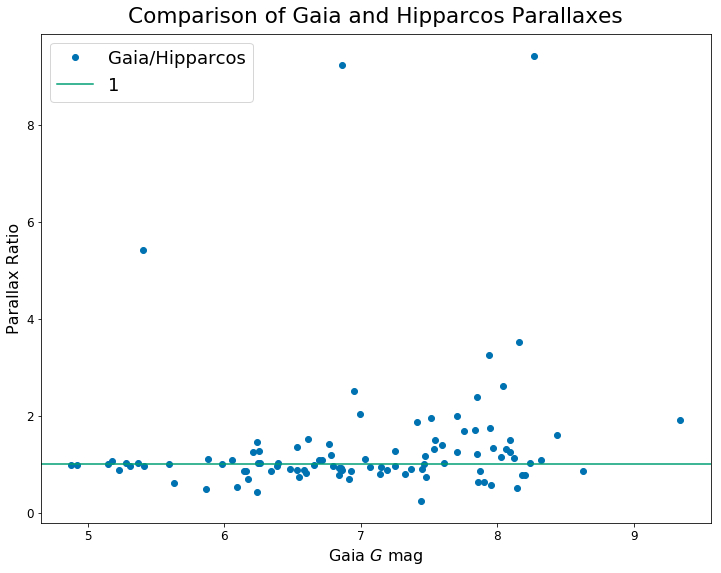

In [123]:
plt.plot(gaia['phot_g_mean_mag'],gaia['parallax']/parallaxes_hip,'.',markersize=12,label='Gaia/Hipparcos')
plt.axhline(1.,color=colours[1],label='1')
plt.legend()
plt.xlabel(r'Gaia $G$ mag')
plt.ylabel('Parallax Ratio')
plt.title('Comparison of Gaia and Hipparcos Parallaxes',y=1.01)
plt.savefig('gaiavship.png')

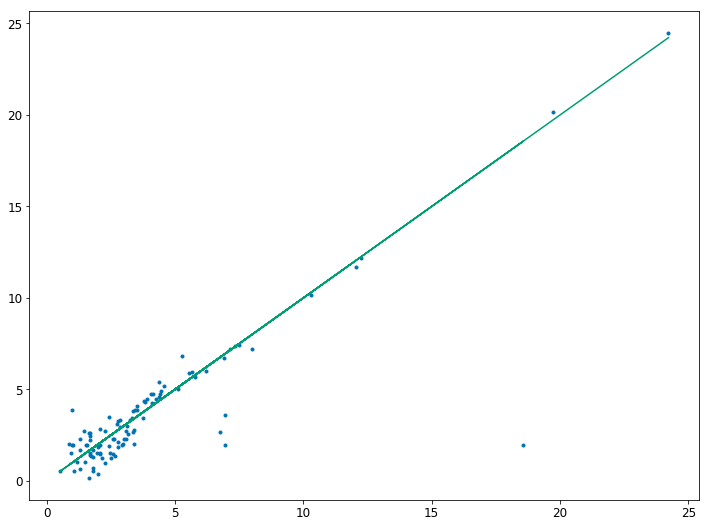

In [113]:
plt.plot(gaia['parallax'],parallaxes_hip,'.')
plt.plot(gaia['parallax'],gaia['parallax'],'-')

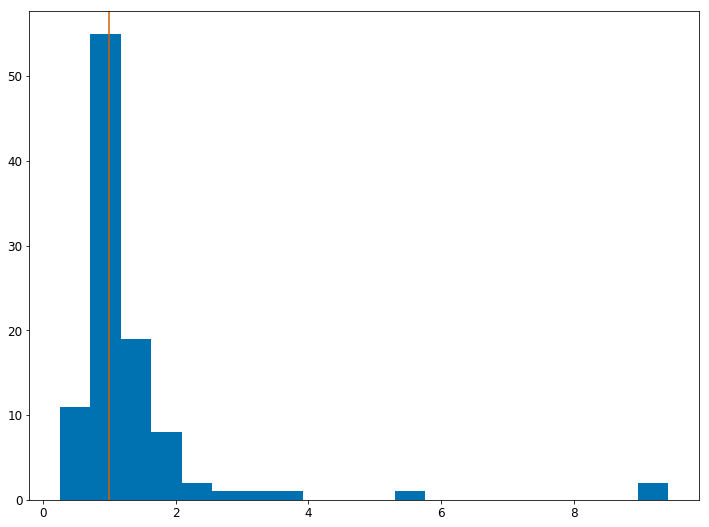

In [117]:
plt.hist(gaia['parallax']/parallaxes_hip,bins=20);
plt.axvline(1,color=colours[2])

### Now let's check everything against the Bright_Kep overall bright kepler catalogue

In [64]:
# import sys
# reload(sys)
# sys.setdefaultencoding('utf8')

brightkep = Table.read('../data/Bright_Kep_new.csv')
# reload(sys)


In [65]:
brightkep.sort('Name')

In [67]:
test = join(cat,brightkep,keys='Name')
test.sort('Name')
test

Name,SpType,[Fe/H],theta,Observed,Seasons,Teff,Log_G,E(B-V),g,r,J,kepmag,Edge_Dist,Notes,Collaborators,Interferometry?,TRES?,Kepler_ID
str10,str15,float64,float64,str29,int64,int64,float64,float64,float64,float64,float64,float64,int64,str84,str16,str3,str3,int64
14_Cyg,B9III,0.08,0.267,unobserved,4,--,--,--,5.334,5.394,5.365,5.49,0,"contact binary, interesting ramp at low freq",--,--,--,7292420
BD+36_3564,K5,--,--,unobserved,4,--,--,--,9.944,8.516,6.134,8.128,141,RG,--,--,--,1575741
BD+39_3577,G5,--,--,unobserved,4,4870,2.513,0.057,8.819,8.062,6.636,8.131,217,RG,--,--,--,4989821
BD+39_3882,F5,--,--,unobserved,4,6241,4.186,0.02,8.463,8.192,7.36,8.259,0,bad light curve,--,--,--,4850372
BD+42_3150,K0,--,--,unobserved,4,4716,2.329,0.063,9.111,8.257,6.743,8.35,261,not sure,--,--,--,7091342
BD+42_3367,M0,--,--,unobserved,4,--,--,--,9.468,7.756,4.983,7.271,269,RG: low freq,--,--,--,7447756
BD+42_3393,K5,--,--,unobserved,4,--,--,--,9.86,8.149,5.362,7.664,139,RG: low freq,--,--,--,6870455
BD+43_3064,K5,--,--,unobserved,3,--,--,--,10.18,8.692,6.205,8.284,0,RG,--,--,--,8075287
BD+43_3068,G0,--,--,unobserved,4,5506,4.394,0.011,8.754,8.254,7.181,8.308,0,not good,--,--,--,8006792


In [42]:
cat

Name,SpType,[Fe/H],theta,Observed,Seasons,Teff,Log_G,E(B-V),g,r,J,kepmag,Edge_Dist,Notes,Collaborators,Interferometry?,TRES?
str10,str15,float64,float64,str29,int64,int64,float64,float64,float64,float64,float64,float64,int64,str84,str16,str3,str3
HD_185351,G9IIIbCN,0.16,1.156,LC:Q1-3 SC:Q16 under,4,--,--,--,6.091,5.176,3.654,5.034,59,RG: Retired A star,Hjorringgaard,--,Yes
HD_186155,F5II-III,0.3,0.57,LC:Q1 under,4,--,--,--,5.44,5.065,4.419,5.055,66,three sharp peaks,--,--,--
HD_175740,G8III,-0.1,1.035,unobserved,4,--,--,--,6.486,5.462,4.08,5.212,0,RG: suppressed l=1,"Tim W, Guy, Cleo",Yes,Yes
HD_184875,A2V,--,0.349,unobserved,4,--,--,--,5.399,5.337,5.128,5.403,0,Classical Pulsator,--,--,--
14_Cyg,B9III,0.08,0.267,unobserved,4,--,--,--,5.334,5.394,5.365,5.49,0,"contact binary, interesting ramp at low freq",--,--,--
HD_189178,B5V,--,0.236,unobserved,4,--,--,--,5.356,5.448,5.595,5.552,0,Classical Pulsator,--,--,--
HD_187372,M1III,--,2.693,unobserved,4,--,--,--,7.805,6.141,2.979,5.672,110,RG: low freq,--,--,--
HD_182694,G7IIIa,-0.01,0.771,LC:Q2 under,4,--,--,--,6.76,5.86,4.437,5.722,137,RG,Tim W,Yes,--
V380_Cyg,B1.1III+B2.5/3V,1.25,0.226,LC:Q11 SC:Q7 9 10 12-17 under,4,--,--,--,5.615,5.675,5.712,5.771,122,Eclipsing_binary,--,--,--


In [31]:
pdcat, pdbr = cat.to_pandas(), brightkep.to_pandas()

In [35]:
pdcat.join(pdbr,on='Name')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### find missing files

In [43]:
import glob
filenames = (glob.glob("../data/lcs/*.csv"))


In [46]:
test = glob.glob("../data/lcs/V543_Lyr_smear_combined.csv")
print test

['../data/lcs/V543_Lyr_smear_combined.csv']


In [49]:
for name in cat['Name']:
    test = glob.glob("../data/lcs/%s_smear_combined.csv" % name)
    print name, test

HD_185351 ['../data/lcs/HD_185351_smear_combined.csv']
HD_186155 ['../data/lcs/HD_186155_smear_combined.csv']
HD_175740 ['../data/lcs/HD_175740_smear_combined.csv']
HD_184875 ['../data/lcs/HD_184875_smear_combined.csv']
14_Cyg ['../data/lcs/14_Cyg_smear_combined.csv']
HD_189178 ['../data/lcs/HD_189178_smear_combined.csv']
HD_187372 ['../data/lcs/HD_187372_smear_combined.csv']
HD_182694 ['../data/lcs/HD_182694_smear_combined.csv']
V380_Cyg ['../data/lcs/V380_Cyg_smear_combined.csv']
HD_186121 ['../data/lcs/HD_186121_smear_combined.csv']
HD_189684 ['../data/lcs/HD_189684_smear_combined.csv']
HD_188252 ['../data/lcs/HD_188252_smear_combined.csv']
HD_181597 ['../data/lcs/HD_181597_smear_combined.csv']
HD_185286 ['../data/lcs/HD_185286_smear_combined.csv']
HD_188875 ['../data/lcs/HD_188875_smear_combined.csv']
HD_175466 ['../data/lcs/HD_175466_smear_combined.csv']
V547_Lyr ['../data/lcs/V547_Lyr_smear_combined.csv']
HD_175884 ['../data/lcs/HD_175884_smear_combined.csv']
HD_181069 ['../data/

In [55]:
brightkep['Kepler_ID'].pprint(max_lines=230)

Kepler_ID
---------
  7292420
 12069424
 12069449
  9528112
  9465763
  8324612
  3441157
  7447756
  6870455
  8313018
 10863107
 10685353
 10988024
  7798339
  8006161
  9812351
  7800227
  9630812
  6580131
  7939145
  7420037
  7339102
  8077489
  6342566
  6101376
  6020867
  7940546
  7940959
  5164767
 10190244
  5939450
  6265087
  4989900
  6584587
 10323222
  9327530
  6670812
 10124866
  7340766
  4136285
  7943968
  7944142
 11443271
  4242575
  6267965
 11338492
 10716853
  8351193
  6106415
  7345479
  7510397
  4818175
  4994443
  2970780
 11600717
 11180361
  9392839
  6675338
 11287318
  4040917
 11753949
 11234835
  7669848
  3836439
 10064283
  8085683
  8153795
  2696955
 11498538
  3429637
 11288450
 10525205
  7105221
  6593264
  3838362
 11603064
  4044238
  6352430
  5262713
  7950369
 10265370
  5352052
  4551179
 11656042
  6195870
  5177450
 11808639
  9764544
  9704050
 11502218
  3946721
  5952403
  4049174
 10005473
  4149233
  9704325
 11708170
 10659688


In [62]:
names_in = []
for name in cat['Name']:
    if name not in brightkep['Name']:
        print name
        names_in.append(name)
        
print len(names_in)

HD_175466
HD_182354
HD_185524
HD_189636A
HD_189750
HD_189636B
BD+36_3564
BD+39_3577
V554_Lyr
BD+47_2825
BD+39_3882
BD+43_3064
BD+43_3068
BD+43_3213
BD+42_3150
BD+43_3171
BD+48_2904
BD+47_2891
18


In [63]:
brightkep['Name'].pprint(max_lines=230)

   Name   
----------
    14_Cyg
  16_Cyg_A
  16_Cyg_B
    AF_Cyg
    AW_Cyg
    AX_Cyg
BD+38_3564
BD+42_3367
BD+42_3393
BD+43_3351
BD+47_2852
BD+47_2949
BD+48_2955
 HD_173109
 HD_173701
 HD_174019
 HD_174020
 HD_174177
 HD_174178
 HD_174621
 HD_174676
 HD_174829
 HD_174880
 HD_175079
 HD_175080
 HD_175132
 HD_175226
 HD_175370
 HD_175537
 HD_175574
 HD_175576
 HD_175740
 HD_175841
 HD_175884
 HD_175955
 HD_176209
 HD_176229
 HD_176465
 HD_176466
 HD_176582
 HD_176626
 HD_176694
 HD_176708
 HD_176845
 HD_176894
 HD_177004
 HD_177151
 HD_177152
 HD_177153
 HD_177328
 HD_177412
 HD_177486
 HD_177697
 HD_177781
 HD_177828
 HD_177876
 HD_177931
 HD_178090
 HD_178158
 HD_178159
 HD_178208
 HD_178612
 HD_178615
 HD_178661
 HD_178797
 HD_178821
 HD_178847
 HD_178848
 HD_178874
 HD_178875
 HD_178910
 HD_179333
 HD_179394
 HD_179395
 HD_179396
 HD_179420
 HD_179421
 HD_179506
 HD_179583
 HD_179935
 HD_179959
 HD_180261
 HD_180312
 HD_180475
 HD_180658
 HD_180682
 HD_180756
 HD_180966
 HD_180967